In [1]:
!pip install pycaret

     |████████████████████████████████| 318 kB 5.3 MB/s 
     |████████████████████████████████| 167 kB 36.9 MB/s 
     |████████████████████████████████| 6.8 MB 52.2 MB/s 
     |████████████████████████████████| 2.0 MB 31.6 MB/s 
     |████████████████████████████████| 1.3 MB 34.0 MB/s 
     |████████████████████████████████| 1.7 MB 53.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 86 kB 2.8 MB/s 
     |████████████████████████████████| 114 kB 34.7 MB/s 
     |████████████████████████████████| 261 kB 28.5 MB/s 
     |████████████████████████████████| 56 kB 3.8 MB/s 
     |████████████████████████████████| 16.5 MB 232 kB/s 
     |████████████████████████████████| 303 kB 35.1 MB/s 
     |████████████████████████████████| 10.9 MB 21.1 MB/s 
     |████████████████████████████████| 102 kB 7.7 MB/s 
     |██████████████████

In [35]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_models/distan_lat42.225lon-8.63p10R4Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [2]:
import pandas as pd
station_all=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_station/LEVX.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
print(station_all)
station_all["dir_o"].describe()

                         temp_o     tempd_o    rh_o  dir_o     spd_o  \
time                                                                   
2008-01-01 00:00:00  278.550001  277.950000   95.91  220.0  3.601108   
2008-01-01 01:00:00  278.050000  277.450001   95.89  230.0  3.086664   
2008-01-01 02:00:00  278.050000  277.649999   97.24  190.0  5.144440   
2008-01-01 02:30:00  276.150001  275.149999   93.14  240.0  3.601108   
2008-01-01 03:00:00  278.750001  277.549999   91.98  230.0  3.086664   
...                         ...         ...     ...    ...       ...   
2020-12-24 21:30:00  278.150000  278.150000  100.00   50.0  2.572220   
2020-12-24 22:00:00  278.150000  277.150000   93.24   60.0  2.057776   
2020-12-24 22:30:00  278.150000  277.150000   93.24   80.0  1.543332   
2020-12-24 23:00:00  278.150000  277.150000   93.24   30.0  3.601108   
2020-12-24 23:30:00  278.150000  277.150000   93.24   40.0  3.086664   

                    wind_gust_o  mslp_o  visibility_o skyc1_o s

count    229250.000000
mean        147.828471
std         120.560398
min          -1.000000
25%           0.000000
50%         190.000000
75%         240.000000
max         360.000000
Name: dir_o, dtype: float64

In [4]:
#resample visibility minor hour before
station=station_all[["dir_o","temp_o"]]


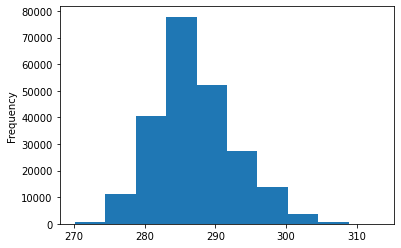

In [8]:

#station.value_counts()
station["temp_o"].plot.hist();

In [5]:
#visibility to interval
interval=pd.IntervalIndex.from_tuples([(-243,271),(271, 273),(273,275),(275,277),
                                       (277,279),(279,281),(281,283),(283,285),
                                       (285,287),(287,289),(289,291),(291,293),
                                       (293,295),(295,297),(297,299),(299,301),
                                       (301,303),(303,305),(305,307),(307,309),
                                       (309,311),(311,313),(313,315),(315,317),
                                       (317,319),(319,321),(321,333)])
        
labels=["(-30,-2]","(-2,0]","(0,2]","(2,4]","(4,6]","(6,8]","(8,10]","(10,12]",
        "(12,14]","(14,16]","(16,18]","(18,20]","(20,22]","(22,24]","(24,26]",
        "(26,28]", "(28,30]","(30,32]","(32,34]","(34,36]","(36,38]","(38,40]",
        "(40,42]","(42,44]","(44,46]","(46,60]"]

station["temp_l"]=pd.cut(station["temp_o"], bins=interval,retbins=False,
                        labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
station=station.drop(columns=["dir_o"])
station.sample(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,temp_o,temp_l
time,,
2009-02-24 01:00:00,282.350001,"(8,10]"
2019-01-26 23:00:00,282.150000,"(8,10]"
2015-08-08 00:00:00,287.150000,"(14,16]"
2019-11-14 17:30:00,283.150000,"(10,12]"
2017-02-22 02:00:00,285.149999,"(12,14]"
2009-12-28 04:00:00,288.250000,"(14,16]"
2008-11-07 01:00:00,283.050000,"(10,12]"
2009-08-25 14:00:00,294.449998,"(20,22]"
2010-03-09 04:00:00,275.850000,"(2,4]"


**Forecast D0**

In [6]:
#ria forecast d1
model4k=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_models/lat42.225lon-8.63p10R4KmD0.csv",parse_dates=["time"]).set_index("time")
model4k

,dir0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,lwflx0,conv_prec0,...,cape9,cin9,cfh9,cfl9,cfm9,cft9,HGT5009,HGT8509,T5009,T8509
time,,,,,,,,,,,,,,,,,,,,,
2008-01-01 01:00:00,144.628357,3.831499,6.448897,102287.132812,280.022430,0.892607,24102.808594,12.980614,293.892212,0.0,...,0.0,-0.000188,1.0,0.000000,0.000000,1.00000,5597.893066,1497.146240,253.327194,277.210388
2008-01-01 02:00:00,147.921097,3.832692,6.672883,102206.570312,280.007874,0.876593,24068.431641,16.218111,301.791016,0.0,...,0.0,0.000039,1.0,0.000000,0.530000,1.00000,5589.398926,1489.944702,252.961868,277.016876
2008-01-01 03:00:00,143.393280,5.442433,8.808276,102199.117188,280.104797,0.852357,24079.357422,30.171259,310.720306,0.0,...,0.0,0.000066,1.0,0.000000,1.000000,1.00000,5583.069824,1489.035278,252.982819,276.464508
2008-01-01 04:00:00,148.121201,5.950326,9.456440,102130.187500,280.257111,0.826763,24082.630859,39.340668,311.036621,0.0,...,0.0,0.000102,1.0,0.000000,1.000000,1.00000,5578.958984,1486.376465,252.923691,276.808807
2008-01-01 05:00:00,144.934830,6.004587,9.431707,102095.398438,280.096802,0.815603,24156.925781,38.444511,268.789703,0.0,...,0.0,-0.000305,0.0,0.000000,0.000000,0.00000,5576.894043,1483.500488,253.006378,277.129700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-11 19:00:00,167.249893,4.803071,10.443219,102130.304688,285.274139,0.883530,24094.119141,30.348995,331.899139,0.0,...,0.0,0.000750,0.6,0.093750,0.000000,0.60000,5669.991211,1510.901978,258.318634,280.277496
2020-11-11 20:00:00,160.990204,5.888032,12.039003,102151.843750,285.359863,0.873678,22888.912109,40.605156,366.950897,0.0,...,0.0,0.000316,0.5,0.500000,0.531250,0.53125,5676.644043,1515.951782,258.397308,280.022552
2020-11-11 21:00:00,169.326263,5.852474,11.513367,102204.882812,285.613678,0.870425,22076.751953,43.137783,367.624512,0.0,...,0.0,-0.000039,0.6,0.500000,0.453125,0.60000,5681.215820,1519.740967,258.154877,280.516174


In [7]:
#label meteorological model temp points 0 to 3
model4k["temp0_l"]=pd.cut(model4k["temp0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model4k["temp1_l"]=pd.cut(model4k["temp1"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model4k["temp2_l"]=pd.cut(model4k["temp2"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model4k["temp3_l"]=pd.cut(model4k["temp3"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)

In [8]:
#concat station model
df_all4k=pd.concat([station,model4k],axis=1).dropna()
df_all4k=df_all4k.drop(columns=["temp_o"])
df_all4k[["temp_l","temp0_l","temp1_l"]].sample(20)

,temp_l,temp0_l,temp1_l
time,,,
2017-01-25 21:00:00,"(8,10]","(8,10]","(6,8]"
2010-06-08 06:00:00,"(14,16]","(14,16]","(14,16]"
2015-01-02 08:00:00,"(4,6]","(4,6]","(4,6]"
2020-06-08 17:00:00,"(20,22]","(18,20]","(18,20]"
2012-07-12 03:00:00,"(10,12]","(8,10]","(8,10]"
2017-02-12 23:00:00,"(8,10]","(8,10]","(8,10]"
2013-04-10 12:00:00,"(14,16]","(12,14]","(12,14]"
2019-12-17 12:00:00,"(6,8]","(8,10]","(8,10]"
2011-02-22 12:00:00,"(10,12]","(12,14]","(12,14]"


In [9]:
print("station\n",df_all4k["temp_l"].value_counts(normalize=True))
print("point 0\n",df_all4k["temp0_l"].value_counts(normalize=True))


station
 (12,14]     0.141174
(10,12]     0.136696
(14,16]     0.125901
(16,18]     0.115390
(8,10]      0.106085
(18,20]     0.088899
(6,8]       0.065407
(20,22]     0.060325
(22,24]     0.041669
(4,6]       0.033401
(24,26]     0.028650
(26,28]     0.017082
(2,4]       0.014895
(28,30]     0.011322
(30,32]     0.005421
(0,2]       0.003168
(32,34]     0.002451
(34,36]     0.001103
(-2,0]      0.000594
(36,38]     0.000311
(38,40]     0.000038
(-30,-2]    0.000009
(40,42]     0.000009
Name: temp_l, dtype: float64
point 0
 (10,12]    0.164450
(12,14]    0.155777
(8,10]     0.128937
(14,16]    0.124959
(16,18]    0.099081
(18,20]    0.072873
(6,8]      0.071214
(20,22]    0.054320
(22,24]    0.037285
(4,6]      0.030516
(24,26]    0.024351
(26,28]    0.015244
(28,30]    0.008353
(2,4]      0.007721
(30,32]    0.003120
(0,2]      0.001028
(32,34]    0.000669
(34,36]    0.000104
Name: temp0_l, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


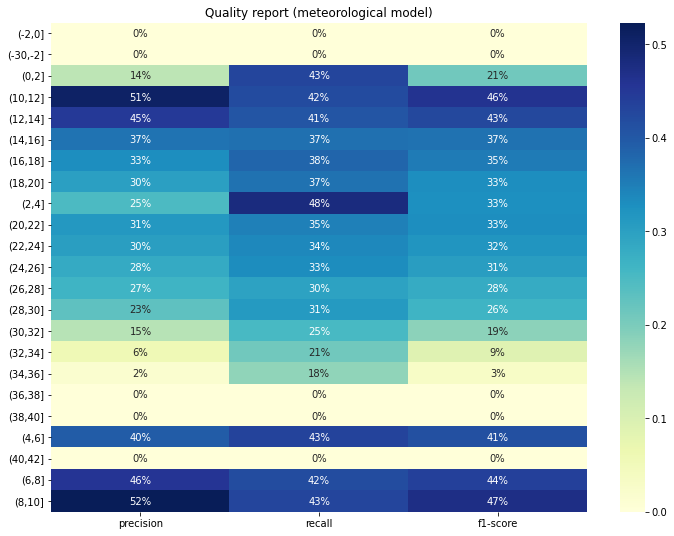

In [10]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.title("Quality report (meteorological model)")
import seaborn as sns
cr=pd.DataFrame(classification_report(df_all4k.temp0_l,df_all4k.temp_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');


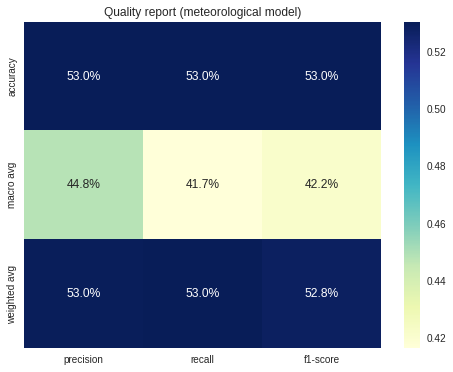

In [37]:
plt.figure(figsize=(8, 6))
plt.title("Quality report (meteorological model)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

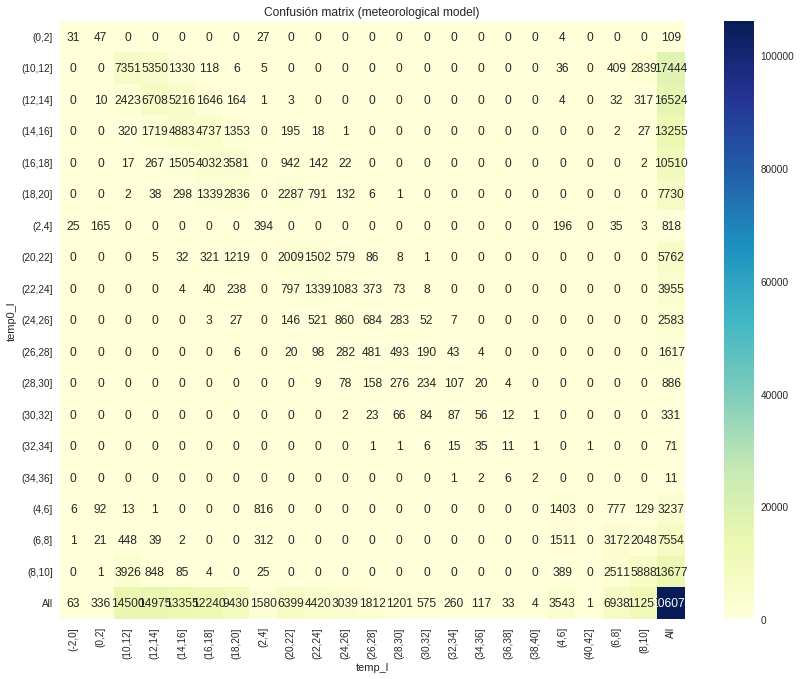

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 11))
plt.title("Confusión matrix (meteorological model)")
import seaborn as sns
global_sc=pd.crosstab( df_all4k.temp0_l,df_all4k.temp_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

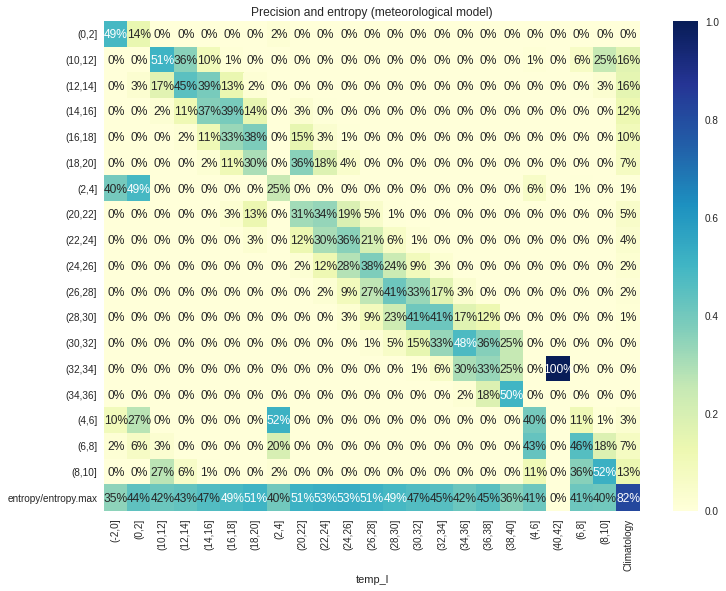

In [40]:
import math
from scipy.stats import entropy
plt.figure(figsize=(12, 9))
plt.title("Precision and entropy (meteorological model)")
column_sc=pd.crosstab( df_all4k.temp0_l,df_all4k.temp_l, margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

In [11]:
#drop  '(-30,-2]'
df_all4k=df_all4k[df_all4k.temp_l!= '(-30,-2]']

**machine learning d0 or d1**

In [12]:
from pycaret.classification import *
#drop variables model labeled
clas = setup(df_all4k.drop(columns=["temp0_l","temp1_l","temp2_l","temp3_l",]),
             target = 'temp_l',
             session_id=20,normalize=False ,train_size=.85,remove_multicollinearity=True,
             fix_imbalance=False,ignore_low_variance=True,feature_selection=False,
             feature_selection_threshold =.15,pca=False,polynomial_features=False,
             trigonometry_features=False,feature_interaction=False)

              

,Description,Value
0,session_id,20
1,Target,temp_l
2,Target Type,Multiclass
3,Label Encoded,"(-2,0]: 0, (0,2]: 1, (10,12]: 2, (12,14]: 3, (..."
4,Original Data,"(106074, 231)"
5,Missing Values,False
6,Numeric Features,230
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [59]:
compare_models(fold=5,sort="F1")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.5120,0.1822,0.3933,0.5106,0.5099,0.4565,0.4567,27.478
rf,Random Forest Classifier,0.5120,0.1827,0.3728,0.5102,0.5095,0.4564,0.4565,63.228
lda,Linear Discriminant Analysis,0.4296,0.1745,0.2978,0.4283,0.4278,0.3651,0.3652,1.824
dt,Decision Tree Classifier,0.4128,0.1336,0.3361,0.4129,0.4127,0.3482,0.3482,6.818
lightgbm,Light Gradient Boosting Machine,0.4005,0.1329,0.2510,0.4079,0.4032,0.3357,0.3359,55.262
knn,K Neighbors Classifier,0.2567,0.1377,0.1862,0.2586,0.2524,0.1673,0.1682,169.768
ridge,Ridge Classifier,0.2786,0.0000,0.1256,0.2475,0.2424,0.1863,0.1905,0.244
lr,Logistic Regression,0.1784,0.1331,0.0760,0.1582,0.1463,0.0639,0.0661,118.664
ada,Ada Boost Classifier,0.2281,0.1136,0.1095,0.0846,0.0957,0.1207,0.1529,28.500
nb,Naive Bayes,0.0923,0.1285,0.1702,0.2243,0.0916,0.0493,0.0557,0.426


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=20, verbose=0,
                     warm_start=False)

In [45]:
model=create_model("lightgbm",n_estimators=150,fold=5)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Split  Fold                                                          
CV-Val 0       0.4160  0.0000  0.2627  0.4214  0.4180  0.3530  0.3531
       1       0.3530  0.6590  0.2310  0.3614  0.3550  0.2843  0.2846
       2       0.3752  0.0000  0.2315  0.3790  0.3766  0.3077  0.3077
       3       0.3496  0.0000  0.1986  0.3627  0.3545  0.2812  0.2814
       4       0.4140  0.0000  0.2725  0.4239  0.4176  0.3511  0.3513
       Mean    0.3816  0.1318  0.2392  0.3897  0.3843  0.3154  0.3156
       Std     0.0287  0.2636  0.0262  0.0276  0.0284  0.0313  0.0312
Train  NaN     0.4288  0.7184  0.2758  0.4352  0.4305  0.3667  0.3669

In [ ]:
plot_model(model, plot = 'auc')

In [ ]:
plot_model(model, plot = 'pr')

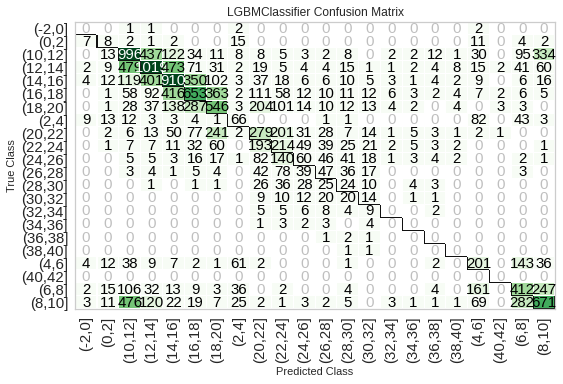

In [46]:
plot_model(model,'confusion_matrix')

In [ ]:
plot_model(model,'class_report')

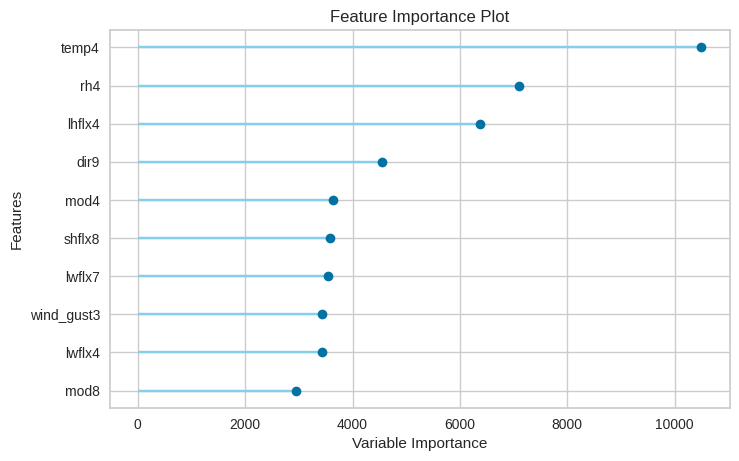

In [48]:
plot_model(model,"feature")

In [ ]:
plot_model(model,"error")

**Export model**

In [13]:
x_var=get_config("X_train").columns
x_var

Index(['dir0', 'visibility0', 'cin0', 'cfl0', 'dir1', 'visibility1', 'cin1',
       'cfl1', 'dir2', 'visibility2', 'cin2', 'cfl2', 'dir3', 'wind_gust3',
       'visibility3', 'cin3', 'cfl3', 'dir4', 'mod4', 'temp4', 'rh4',
       'visibility4', 'lhflx4', 'lwflx4', 'cape4', 'cin4', 'cfl4', 'dir5',
       'visibility5', 'cin5', 'cfl5', 'dir6', 'visibility6', 'cin6', 'cfl6',
       'cfm6', 'cft6', 'dir7', 'visibility7', 'lwflx7', 'cin7', 'cfh7', 'cfl7',
       'cfm7', 'dir8', 'mod8', 'visibility8', 'shflx8', 'cin8', 'cfh8', 'cfl8',
       'dir9', 'visibility9', 'cin9', 'cfl9', 'cft9'],
      dtype='object')

In [14]:
#define x and y
Y=df_all4k.temp_l
X=df_all4k[x_var]

In [23]:
#Run the machine learning model
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=1)
#ml_model=ExtraTreesClassifier(n_estimators=150).fit(X_train,y_train)
ml_model=LGBMClassifier(n_estimators=250).fit(X_train,y_train)


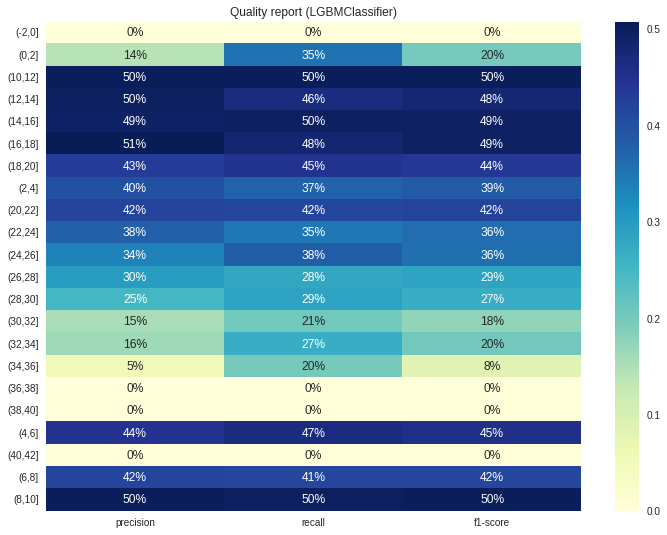

In [24]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
cr=pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T
plt.figure(figsize=(12, 9))
plt.title("Quality report (LGBMClassifier)")
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');


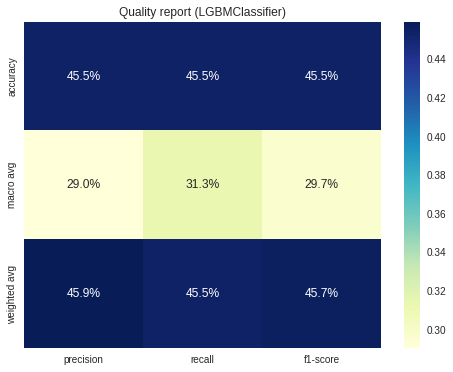

In [25]:
plt.figure(figsize=(8, 6))
plt.title("Quality report (LGBMClassifier)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

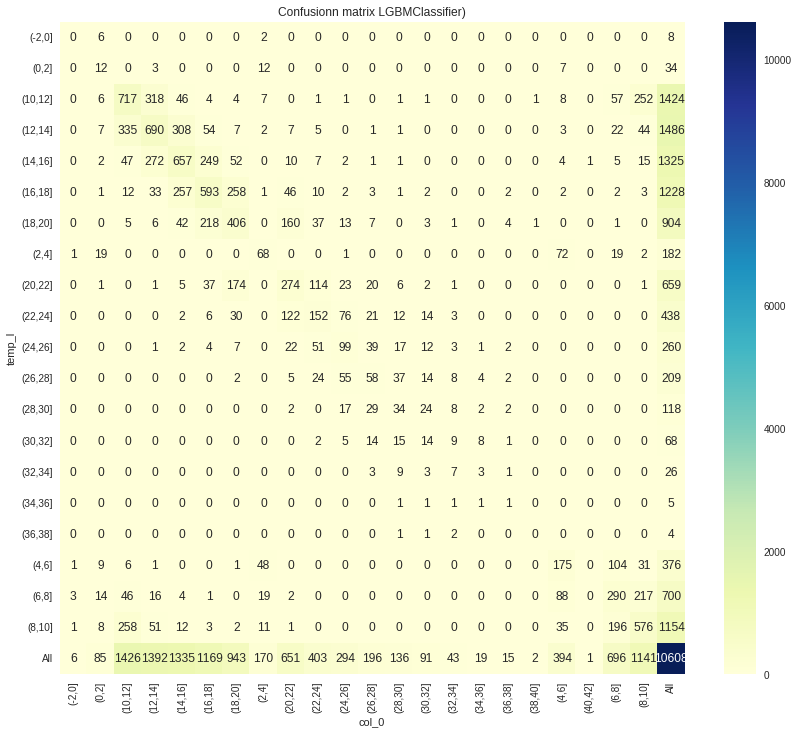

In [26]:
plt.figure(figsize=(14, 12))
plt.title("Confusionn matrix LGBMClassifier)")
import seaborn as sns
global_sc=pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

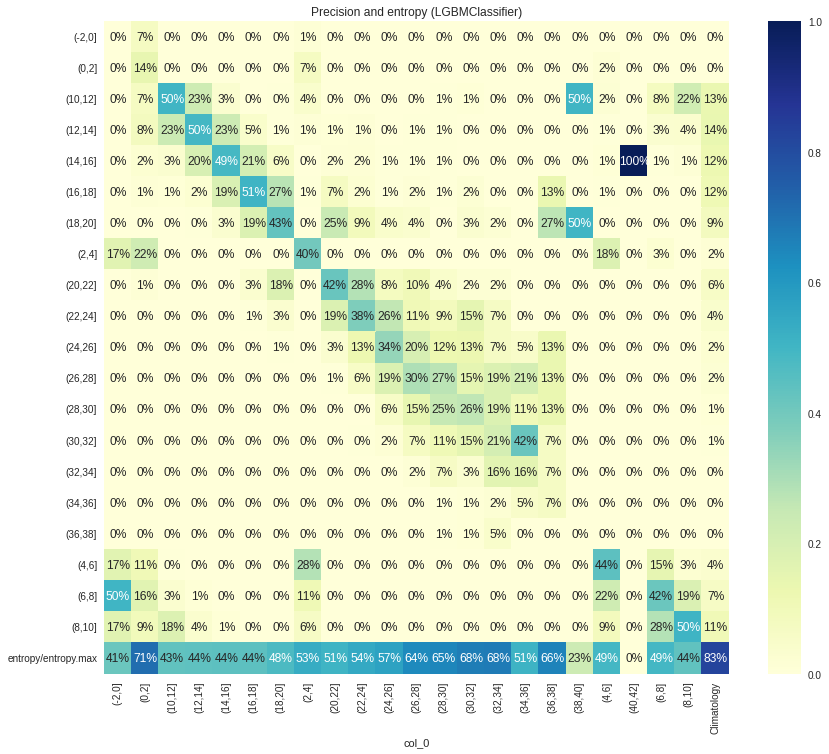

In [27]:
import math
from scipy.stats import entropy
plt.figure(figsize=(14, 12))
plt.title("Precision and entropy (LGBMClassifier)")
column_sc=pd.crosstab(y_test, ml_model.predict(X_test), margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

**Export algorithm**

In [58]:
import pickle
model_dict={"x_var":x_var,"ml_model":ml_model,"coor":coor}
pickle.dump(model_dict, open("temp_LEVX_d0.al", 'wb'))

**New model Extra Tree. Too heavy to be exported!!**

In [29]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=1)
ml_model=ExtraTreesClassifier(n_estimators=150).fit(X_train,y_train)



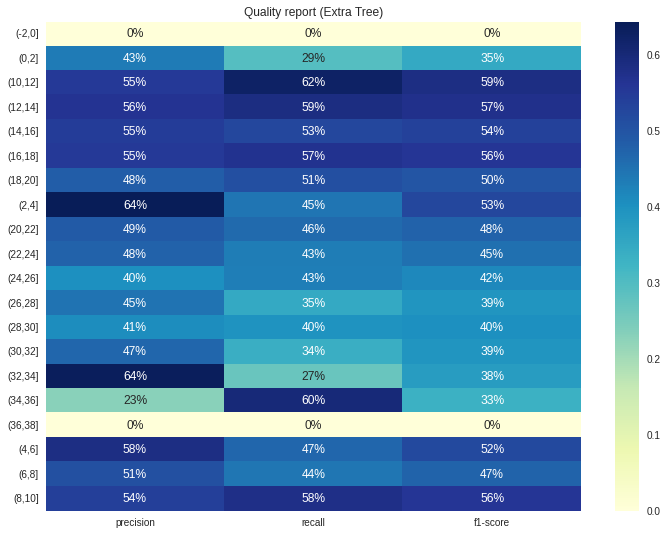

In [30]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
cr=pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T
plt.figure(figsize=(12, 9))
plt.title("Quality report (Extra Tree)")
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');

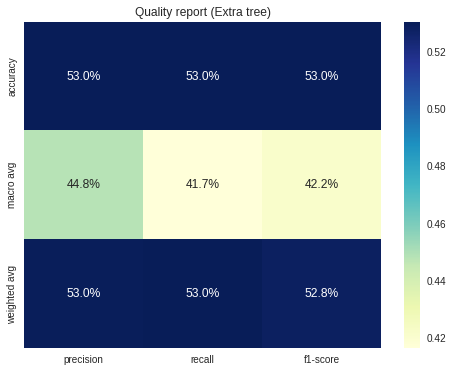

In [31]:
plt.figure(figsize=(8, 6))
plt.title("Quality report (Extra tree)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

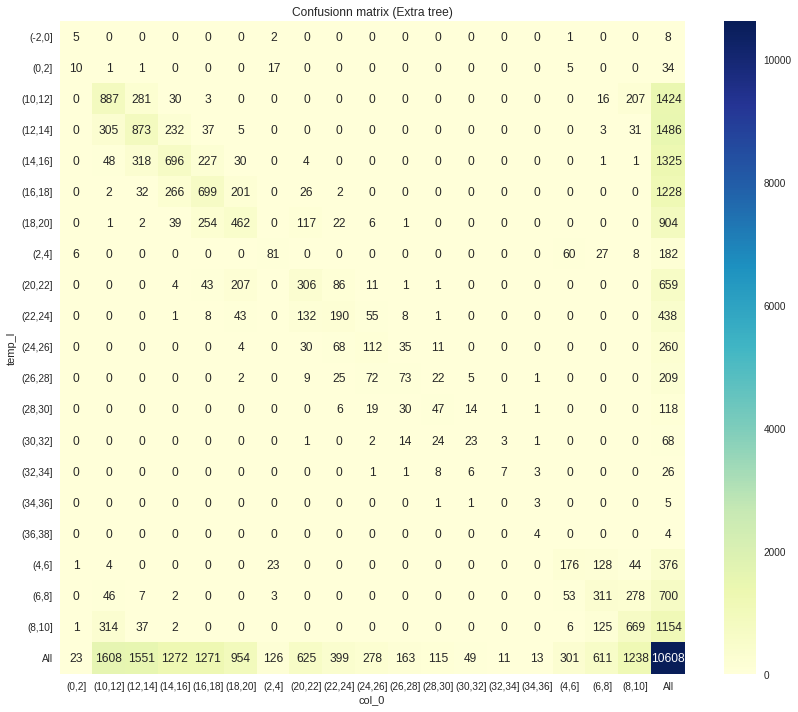

In [32]:
plt.figure(figsize=(14, 12))
plt.title("Confusionn matrix (Extra tree)")
import seaborn as sns
global_sc=pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

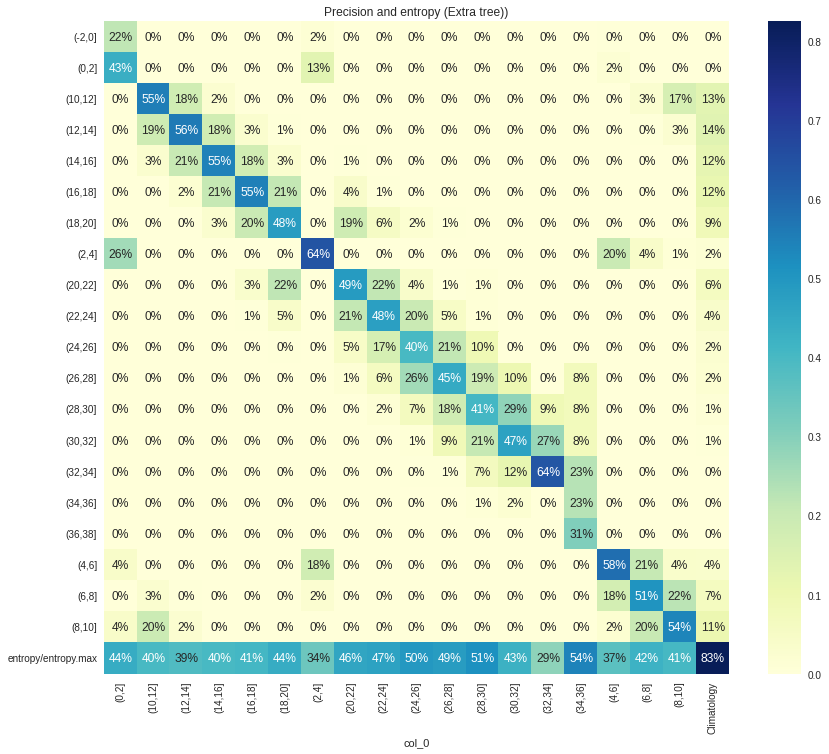

In [33]:
import math
from scipy.stats import entropy
plt.figure(figsize=(14, 12))
plt.title("Precision and entropy (Extra tree))")
column_sc=pd.crosstab(y_test, ml_model.predict(X_test), margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

In [36]:
import pickle
model_dict={"x_var":x_var,"ml_model":ml_model,"coor":coor}
pickle.dump(model_dict, open("temp_LEVX_d0.al", 'wb'))
#400 Mb too heavy to be exported